In [1]:
from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()

# Load into pandas
df = pd.read_csv("cleaned_global_water_consumption.csv")

print(df.head())


Saving cleaned_global_water_consumption.csv to cleaned_global_water_consumption.csv
     Country  Year  Total Water Consumption (Billion Cubic Meters)  \
0  Argentina  2000                                      481.490000   
1  Argentina  2001                                      455.063000   
2  Argentina  2002                                      482.749231   
3  Argentina  2003                                      452.660000   
4  Argentina  2004                                      634.566000   

   Per Capita Water Use (Liters per Day)  Agricultural Water Use (%)  \
0                             235.431429                   48.550000   
1                             299.551000                   48.465000   
2                             340.124615                   50.375385   
3                             326.756667                   49.086667   
4                             230.346000                   38.670000   

   Industrial Water Use (%)  Household Water Use (%)  \
0     

In [2]:
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nFirst 5 Rows:\n", df.head())

Dataset Shape: (500, 10)

Data Types:
 Country                                            object
Year                                                int64
Total Water Consumption (Billion Cubic Meters)    float64
Per Capita Water Use (Liters per Day)             float64
Agricultural Water Use (%)                        float64
Industrial Water Use (%)                          float64
Household Water Use (%)                           float64
Rainfall Impact (Annual Precipitation in mm)      float64
Groundwater Depletion Rate (%)                    float64
Water Scarcity Level                               object
dtype: object

First 5 Rows:
      Country  Year  Total Water Consumption (Billion Cubic Meters)  \
0  Argentina  2000                                      481.490000   
1  Argentina  2001                                      455.063000   
2  Argentina  2002                                      482.749231   
3  Argentina  2003                                      452.660000   
4

In [3]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Country                                           0
Year                                              0
Total Water Consumption (Billion Cubic Meters)    0
Per Capita Water Use (Liters per Day)             0
Agricultural Water Use (%)                        0
Industrial Water Use (%)                          0
Household Water Use (%)                           0
Rainfall Impact (Annual Precipitation in mm)      0
Groundwater Depletion Rate (%)                    0
Water Scarcity Level                              0
dtype: int64


In [4]:
print("\nDuplicate Rows:", df.duplicated().sum())


Duplicate Rows: 0


In [5]:
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
               Year  Total Water Consumption (Billion Cubic Meters)  \
count   500.000000                                      500.000000   
mean   2012.000000                                      501.224430   
std       7.218324                                       96.078937   
min    2000.000000                                      129.636667   
25%    2006.000000                                      441.447385   
50%    2012.000000                                      502.197154   
75%    2018.000000                                      563.849594   
max    2024.000000                                      798.418000   

       Per Capita Water Use (Liters per Day)  Agricultural Water Use (%)  \
count                             500.000000                  500.000000   
mean                              276.004782                   50.180829   
std                                42.669593                    5.566886   
min                               111.70833

In [6]:
numeric_cols = df.select_dtypes(include=['float64','int64']).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    if outliers > 0:
        print(f"{col}: {outliers} outliers")

Total Water Consumption (Billion Cubic Meters): 10 outliers
Per Capita Water Use (Liters per Day): 8 outliers
Agricultural Water Use (%): 4 outliers
Industrial Water Use (%): 6 outliers
Household Water Use (%): 12 outliers
Rainfall Impact (Annual Precipitation in mm): 4 outliers
Groundwater Depletion Rate (%): 6 outliers


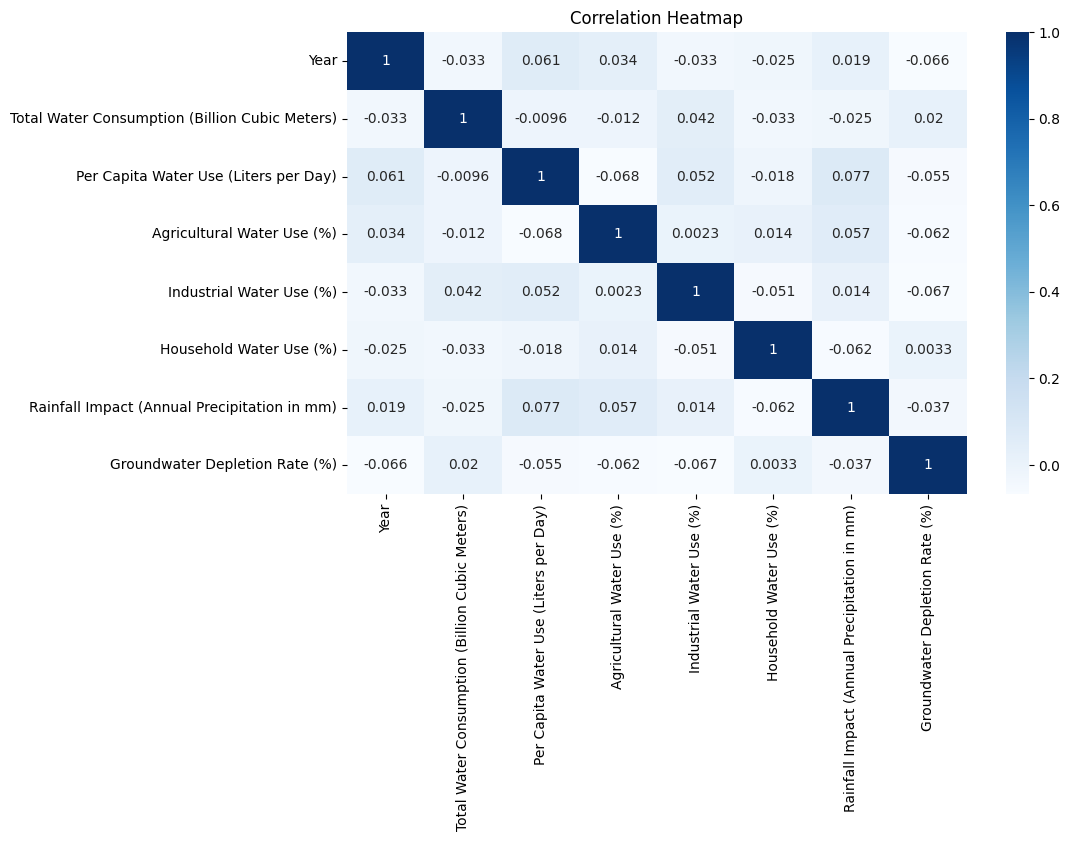

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

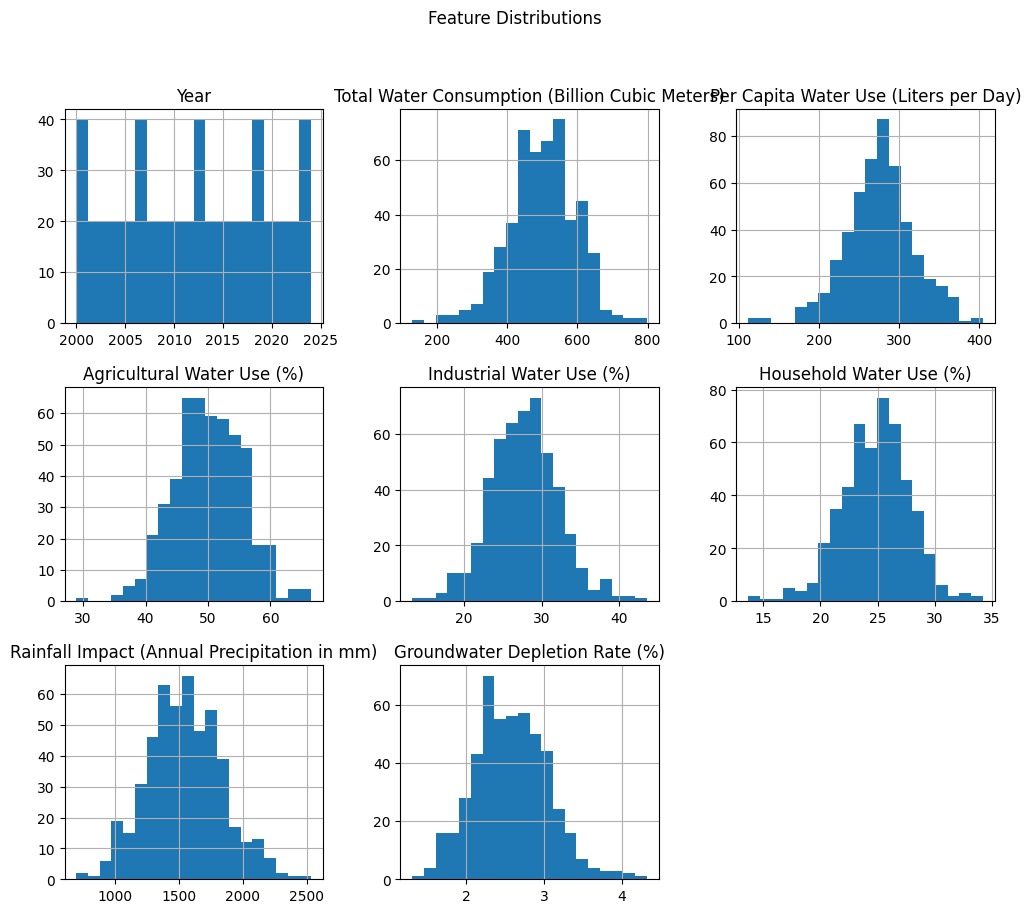

In [10]:
df.hist(figsize=(12,10), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

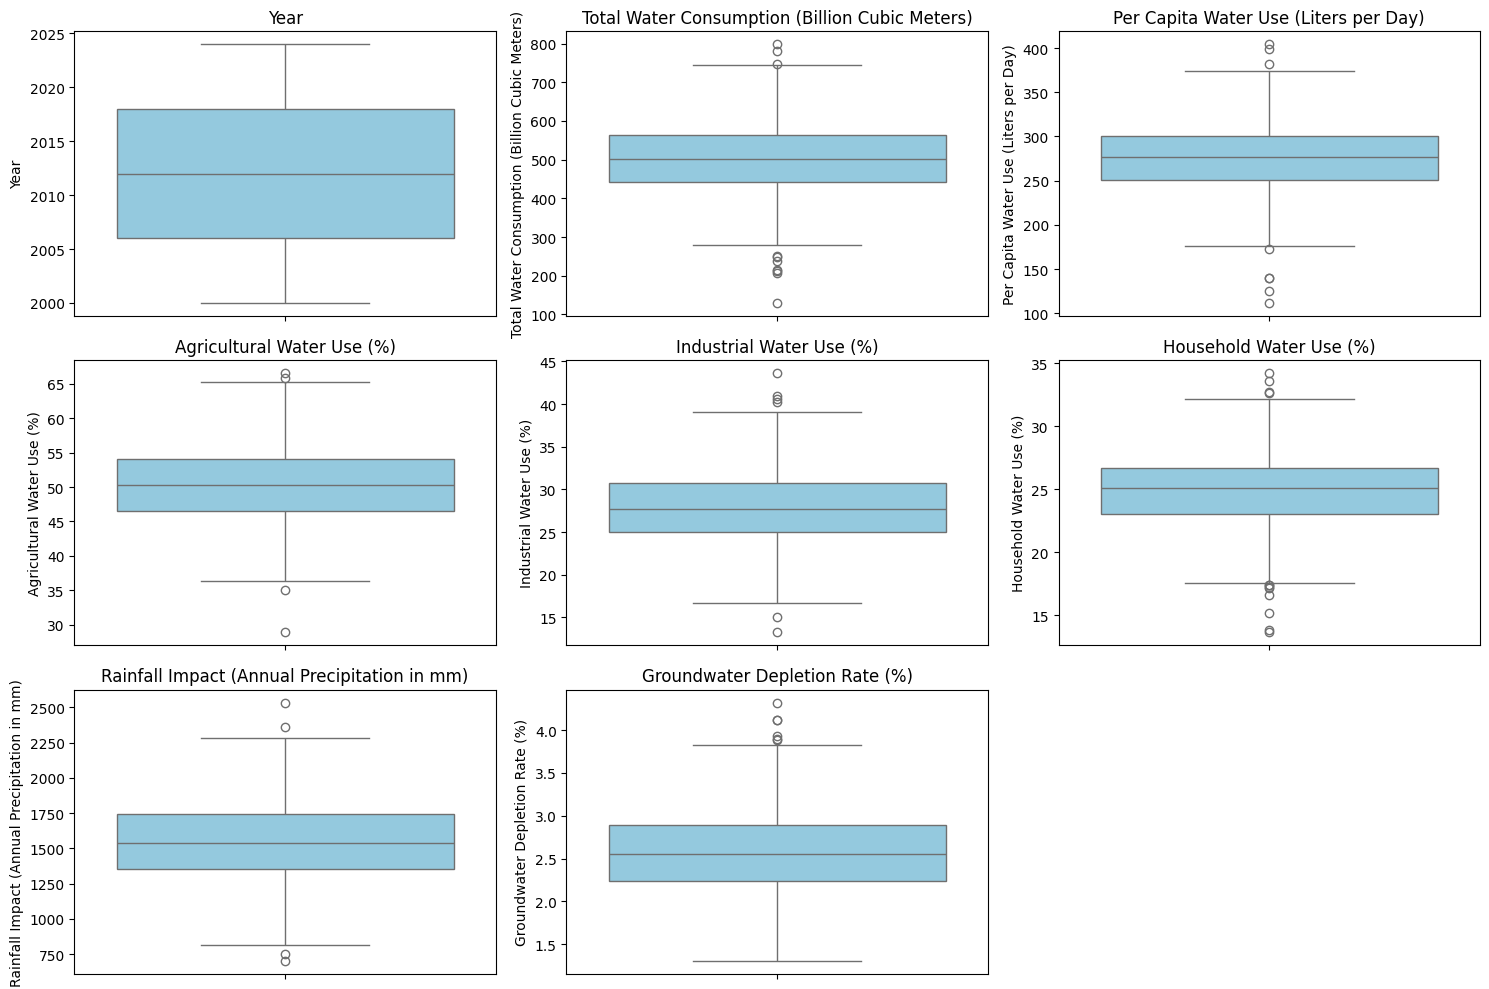

In [11]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3,3,i)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(col)
plt.tight_layout()
plt.show()

In [12]:
df.to_csv("cleaned_dataset_week1.csv", index=False)
print("\nCleaned dataset saved as 'cleaned_dataset_week1.csv'")


Cleaned dataset saved as 'cleaned_dataset_week1.csv'
